In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
#import mne
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)  # or 1000
pd.set_option('display.max_rows', 100)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [4]:
wave='alpha' # or 'beta'
if wave=='alpha':
    RMS='aRMS'
elif wave=='beta':
    RMS='bRMS'

In [5]:
paths = 'E:\\jesyin\\SIN attention\\FFRs_FFT\\'
datapaths=[paths]
files=[]
#while datapaths:
    # paths.pop() gets top of directory stack to process
    # os.scandir is easier and more efficient than os.listdir,
    # though it must be closed (but with statement does this for us)
#    with os.scandir(datapaths.pop()) as entries:
#        for entry in entries:  # loop through the folder
            #print(entry.name)  # print text to keep track the process
#            if entry.name.startswith('Sub3_poz_rms_'):
#                files.append(entry.path)
           
while datapaths:
    # paths.pop() gets top of directory stack to process
    # os.scandir is easier and more efficient than os.listdir,
    # though it must be closed (but with statement does this for us)
    with os.scandir(datapaths.pop()) as entries:
        for entry in entries:  # loop through the folder
            #print(entry.name)  # print text to keep track the process
            file=os.path.join(paths,entry)
            with open(file) as f:
                if '_poz_rms_' in f.name:
                    files.append(entry.path)

In [6]:
#files

In [7]:
fclean_active=[]
fclean_passive=[]
for file in files:
    if '_ca' in file:
        fclean_active.append(file)
    
    if '_cp' in file:
        fclean_passive.append(file)

print(len(fclean_active))
print(len(fclean_passive))

20
20


In [8]:
fnoise_active=[]
fnoise_passive=[]
for file in files:
    if '_na' in file:
        fnoise_active.append(file)
    
    if '_np' in file:
        fnoise_passive.append(file)

print(len(fnoise_active))
print(len(fnoise_passive))

20
20


## Clean active vs passive

In [9]:
import pickle
import re
sub_list=[]
for ff in range(len(fclean_active)):
    subject = fclean_active[ff].split('\\')[-1].split('_')[0]
    subnum = sum([int(s) for s in re.findall(r'\d+',subject)])
    
    f =open(fclean_active[ff],'rb')
    fload=pickle.load(f)
    poz_df=[]
    poz_df=fload
    poz_df['Sub']=subnum
    sub_list.append(subnum)
    if ff==0:
        poz_ca_df=poz_df
        print(ff,poz_ca_df)
    elif ff>0:
        poz_ca_df=pd.concat([poz_ca_df, poz_df])
        print(ff,poz_ca_df)

0           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000002  0.000001  1.264924  0.606468     0    L   10
1     0.000001  0.000001  0.921251  0.661316     0    L   10
2     0.000002  0.000001  1.409303  1.289655     H    H   10
3     0.000002  0.000002  1.933489  1.740864     H    H   10
4     0.000001  0.000001  0.778243  0.668644     0    L   10
...        ...       ...       ...       ...   ...  ...  ...
3991  0.000002  0.000001  1.825152  0.987441     H    0   10
3992  0.000002  0.000002  1.552563  1.473634     H    H   10
3993  0.000003  0.000001  2.443592  1.211356     H    0   10
3994  0.000001  0.000001  0.938683  1.203672     0    0   10
3995  0.000002  0.000001  1.358374  1.222937     H    0   10

[3996 rows x 7 columns]
1           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000002  0.000001  1.264924  0.606468     0    L   10
1     0.000001  0.000001  0.921251  0.661316     0    L   10
2     0.000002  0.000001  1.409303  1.289655     H    H 

[55969 rows x 7 columns]
14           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000002  0.000001  1.264924  0.606468     0    L   10
1     0.000001  0.000001  0.921251  0.661316     0    L   10
2     0.000002  0.000001  1.409303  1.289655     H    H   10
3     0.000002  0.000002  1.933489  1.740864     H    H   10
4     0.000001  0.000001  0.778243  0.668644     0    L   10
...        ...       ...       ...       ...   ...  ...  ...
3992  0.000002  0.000002  0.951768  0.939183     0    0    4
3993  0.000002  0.000003  0.799979  1.180132     0    0    4
3994  0.000002  0.000002   0.65791  0.645251     L    L    4
3995  0.000002  0.000002  0.650046  0.788206     L    0    4
3996  0.000002  0.000004  0.640853  1.690817     L    H    4

[59966 rows x 7 columns]
15           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000002  0.000001  1.264924  0.606468     0    L   10
1     0.000001  0.000001  0.921251  0.661316     0    L   10
2     0.000002  0.000001  1.

In [10]:
for ff in range(len(fclean_passive)):
    subject = fclean_passive[ff].split('\\')[-1].split('_')[0]
    subnum = sum([int(s) for s in re.findall(r'\d+',subject)])
    
    f =open(fclean_passive[ff],'rb')
    fload=pickle.load(f)
    poz_df=[]
    poz_df=fload
    poz_df['Sub']=subnum
    if ff==0:
        poz_cp_df=poz_df
        print(ff,poz_cp_df)
    elif ff>0:
        poz_cp_df=pd.concat([poz_cp_df, poz_df])
        print(ff,poz_cp_df)

0           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000002  0.000001  1.344692  0.807524     H    0   10
1     0.000002  0.000001  1.574445  1.024696     H    0   10
2     0.000001  0.000001  0.909147  1.036568     0    0   10
3     0.000001       0.0  0.540253  0.413645     L    L   10
4     0.000001  0.000001  0.806305   1.05686     0    0   10
...        ...       ...       ...       ...   ...  ...  ...
3995  0.000001  0.000001  0.770196  1.237031     0    0   10
3996  0.000002  0.000001  1.173458  1.188723     0    0   10
3997  0.000001  0.000001  0.749613  1.281547     0    H   10
3998  0.000001  0.000001  0.576673  0.528833     L    L   10
3999  0.000001  0.000001   0.85053  0.924276     0    0   10

[4000 rows x 7 columns]
1           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000002  0.000001  1.344692  0.807524     H    0   10
1     0.000002  0.000001  1.574445  1.024696     H    0   10
2     0.000001  0.000001  0.909147  1.036568     0    0 

[43999 rows x 7 columns]
11           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000002  0.000001  1.344692  0.807524     H    0   10
1     0.000002  0.000001  1.574445  1.024696     H    0   10
2     0.000001  0.000001  0.909147  1.036568     0    0   10
3     0.000001       0.0  0.540253  0.413645     L    L   10
4     0.000001  0.000001  0.806305   1.05686     0    0   10
...        ...       ...       ...       ...   ...  ...  ...
3997  0.000002  0.000001    1.2189  0.998687     0    0   20
3998  0.000002  0.000001  1.216568  1.072418     0    0   20
3999  0.000002  0.000001  1.336384  0.832813     0    0   20
4000  0.000002  0.000001  0.870709   1.06901     0    0   20
4001  0.000001  0.000002  0.782807  1.851434     0    H   20

[48001 rows x 7 columns]
12           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000002  0.000001  1.344692  0.807524     H    0   10
1     0.000002  0.000001  1.574445  1.024696     H    0   10
2     0.000001  0.000001  0.

Sub10


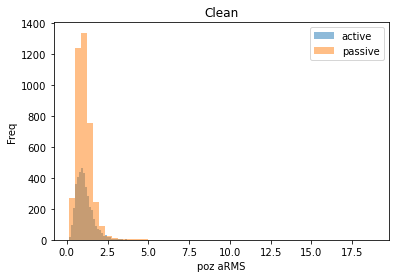

Sub11


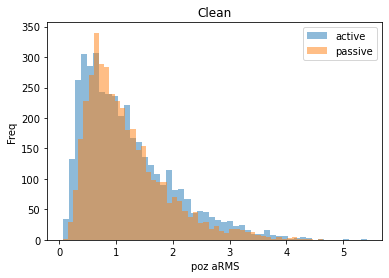

Sub12


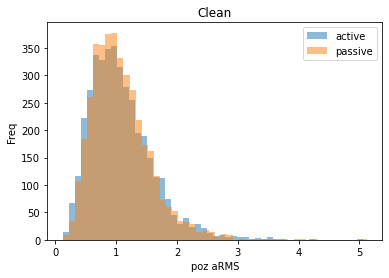

Sub13


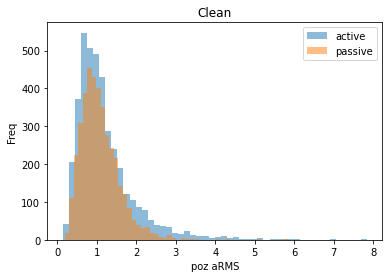

Sub14


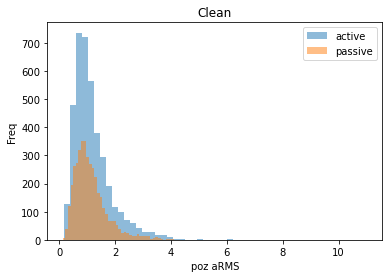

Sub15


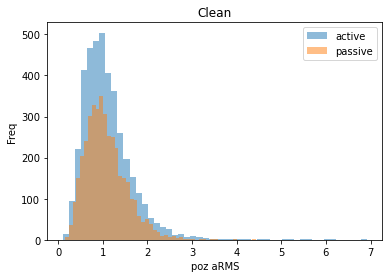

Sub16


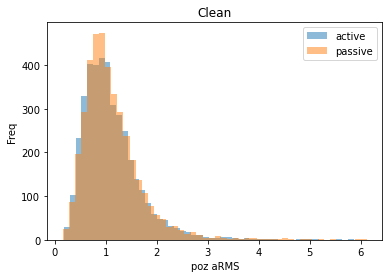

Sub17


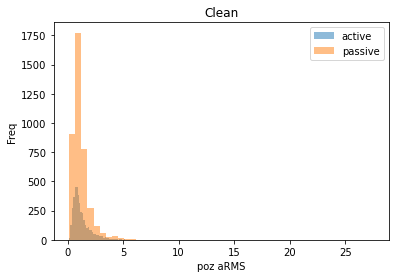

Sub18


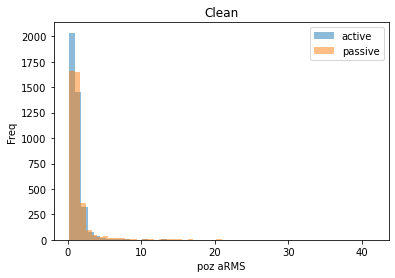

Sub19


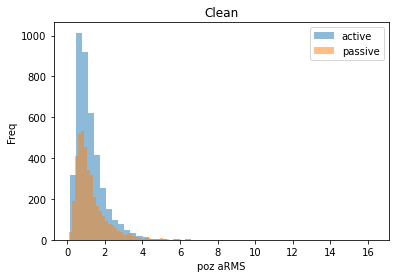

Sub1


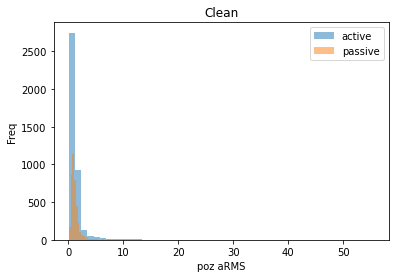

Sub20


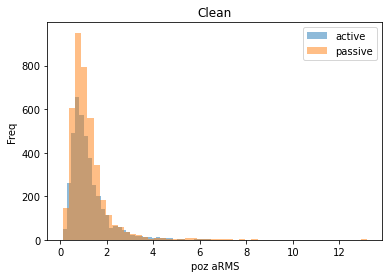

Sub2


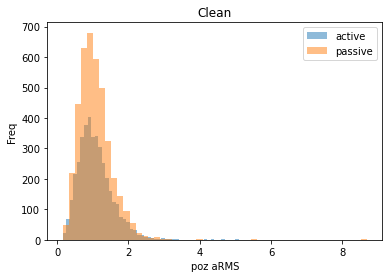

Sub3


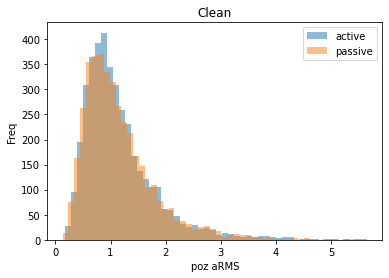

Sub4


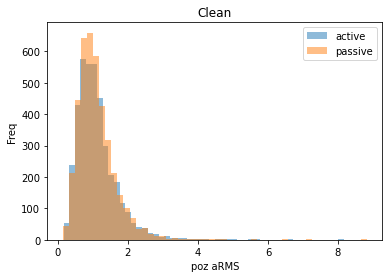

Sub5


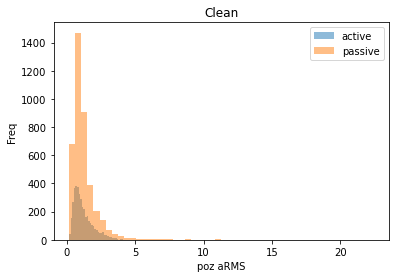

Sub6


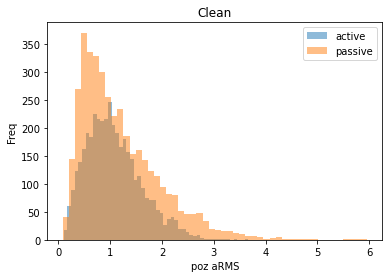

Sub7


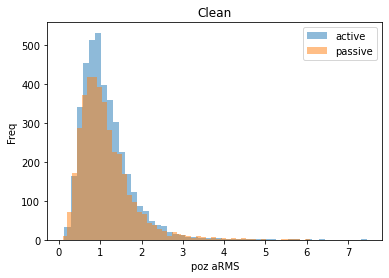

Sub8


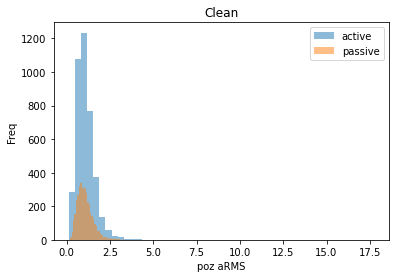

Sub9


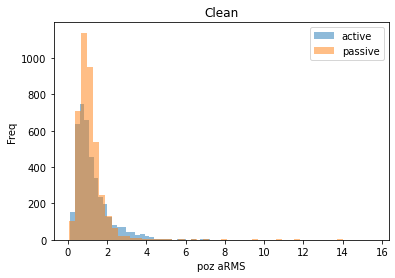

In [11]:
for sub in sub_list:
    sub_ca_df=poz_ca_df[poz_ca_df['Sub']==sub]
    sub_cp_df=poz_cp_df[poz_cp_df['Sub']==sub]
    print('Sub'+str(sub))
    plt.figure()
    plt.hist(sub_ca_df['norm '+RMS],bins=50,alpha=0.5,label='active')
    plt.hist(sub_cp_df['norm '+RMS],bins=50,alpha=0.5,label='passive')
    plt.ylabel('Freq')
    plt.xlabel('poz '+RMS)
    plt.legend()
    plt.title('Clean')
    plt.show()

In [12]:
#sub_cp_df=poz_cp_df[poz_cp_df['Sub']==3]
#sub_cp_df    

## Noise active vs passive

In [13]:
for ff in range(len(fnoise_active)):
    subject = fnoise_active[ff].split('\\')[-1].split('_')[0]
    subnum = sum([int(s) for s in re.findall(r'\d+',subject)])
    
    f =open(fnoise_active[ff],'rb')
    fload=pickle.load(f)
    poz_df=[]
    poz_df=fload
    poz_df['Sub']=subnum
    if ff==0:
        poz_na_df=poz_df
        print(ff,poz_na_df)
    elif ff>0:
        poz_na_df=pd.concat([poz_na_df, poz_df])
        print(ff,poz_na_df)

0           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000001       0.0  0.584798  0.446798     L    L   10
1     0.000001  0.000001  0.890755   0.81101     0    0   10
2     0.000001       0.0  0.600692  0.508151     L    L   10
3     0.000001  0.000001  0.882169  1.151648     0    0   10
4     0.000001  0.000001  0.686971  0.792887     L    0   10
...        ...       ...       ...       ...   ...  ...  ...
3993  0.000001  0.000001  0.772236  1.035503     0    0   10
3994  0.000002  0.000002  1.234484  2.019298     0    H   10
3995  0.000002  0.000001  1.276324  0.950643     0    0   10
3996  0.000001  0.000002  1.070922  1.749316     0    H   10
3997  0.000001  0.000001  0.550703  1.272573     L    H   10

[3998 rows x 7 columns]
1           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000001       0.0  0.584798  0.446798     L    L   10
1     0.000001  0.000001  0.890755   0.81101     0    0   10
2     0.000001       0.0  0.600692  0.508151     L    L 

[71791 rows x 7 columns]
18           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000001       0.0  0.584798  0.446798     L    L   10
1     0.000001  0.000001  0.890755   0.81101     0    0   10
2     0.000001       0.0  0.600692  0.508151     L    L   10
3     0.000001  0.000001  0.882169  1.151648     0    0   10
4     0.000001  0.000001  0.686971  0.792887     L    0   10
...        ...       ...       ...       ...   ...  ...  ...
3993  0.000001  0.000001  0.685239  0.568758     L    L    8
3994  0.000001  0.000001   1.20783  0.967421     0    0    8
3995  0.000001  0.000001  1.123566  1.047754     0    0    8
3996  0.000001  0.000001  1.101739  1.038022     0    0    8
3997  0.000002  0.000001  1.720856  0.837132     H    0    8

[75789 rows x 7 columns]
19           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000001       0.0  0.584798  0.446798     L    L   10
1     0.000001  0.000001  0.890755   0.81101     0    0   10
2     0.000001       0.0  0.

In [14]:
for ff in range(len(fnoise_passive)):
    subject = fnoise_passive[ff].split('\\')[-1].split('_')[0]
    subnum = sum([int(s) for s in re.findall(r'\d+',subject)])
    
    f =open(fnoise_passive[ff],'rb')
    fload=pickle.load(f)
    poz_df=[]
    poz_df=fload
    poz_df['Sub']=subnum
    if ff==0:
        poz_np_df=poz_df
        print(ff,poz_np_df)
    elif ff>0:
        poz_np_df=pd.concat([poz_np_df, poz_df])
        print(ff,poz_np_df)

0           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000001  0.000001  0.417205  1.148441     L    0   10
1     0.000001  0.000001  0.907375  1.262355     0    0   10
2     0.000001  0.000001  0.864376  0.907948     0    0   10
3     0.000001       0.0  0.784065  0.298603     0    L   10
4     0.000001  0.000001  0.978908  1.300892     0    0   10
...        ...       ...       ...       ...   ...  ...  ...
3995  0.000001  0.000001  0.844929  1.173005     0    0   10
3996  0.000002  0.000001  1.320355  0.751696     0    0   10
3997  0.000002  0.000001   1.31147  0.961598     0    0   10
3998  0.000001  0.000001  0.918935  0.539182     0    L   10
3999  0.000002  0.000002  1.242283   1.78193     0    H   10

[4000 rows x 7 columns]
1           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000001  0.000001  0.417205  1.148441     L    0   10
1     0.000001  0.000001  0.907375  1.262355     0    0   10
2     0.000001  0.000001  0.864376  0.907948     0    0 

11           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000001  0.000001  0.417205  1.148441     L    0   10
1     0.000001  0.000001  0.907375  1.262355     0    0   10
2     0.000001  0.000001  0.864376  0.907948     0    0   10
3     0.000001       0.0  0.784065  0.298603     0    L   10
4     0.000001  0.000001  0.978908  1.300892     0    0   10
...        ...       ...       ...       ...   ...  ...  ...
3995  0.000003  0.000003  1.438568  2.371865     H    H   20
3996  0.000001  0.000001  0.791525  1.000526     0    0   20
3997  0.000001  0.000001  0.694925  0.682584     L    L   20
3998  0.000002  0.000002  1.185947  1.780229     0    H   20
3999  0.000001  0.000001  0.698446  1.001066     L    0   20

[48000 rows x 7 columns]
12           aRMS      bRMS norm aRMS norm bRMS alpha beta  Sub
0     0.000001  0.000001  0.417205  1.148441     L    0   10
1     0.000001  0.000001  0.907375  1.262355     0    0   10
2     0.000001  0.000001  0.864376  0.907948     0   

Sub10


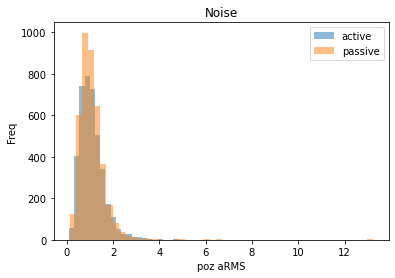

Sub11


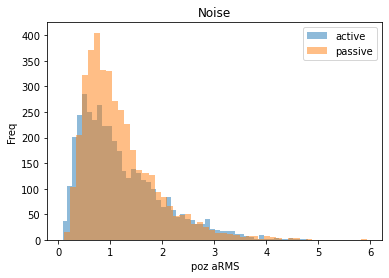

Sub12


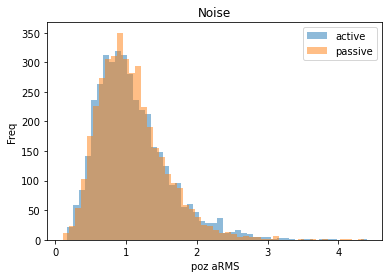

Sub13


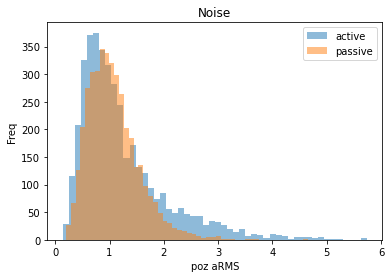

Sub14


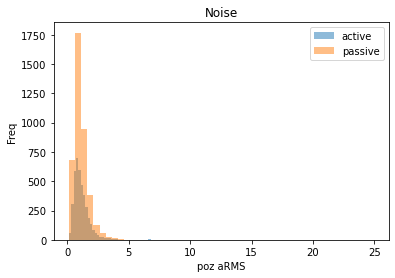

Sub15


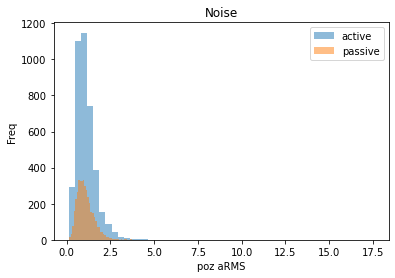

Sub16


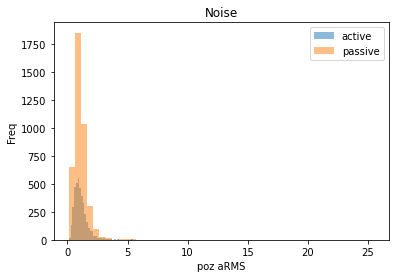

Sub17


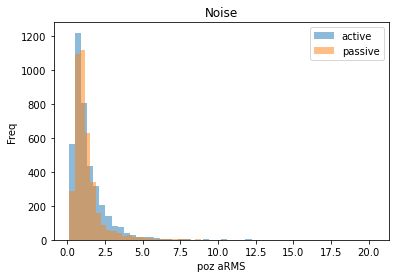

Sub18


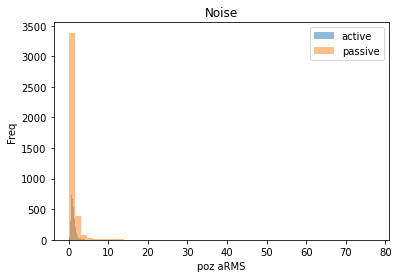

Sub19


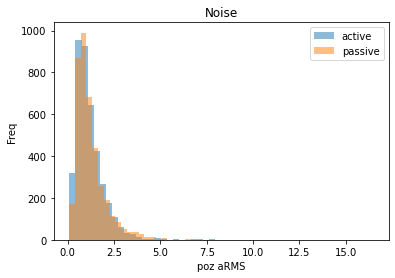

Sub1


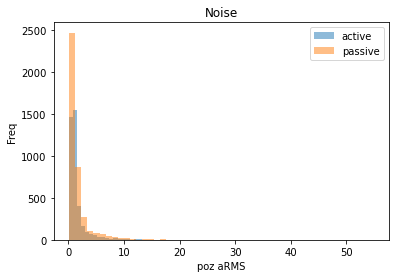

Sub20


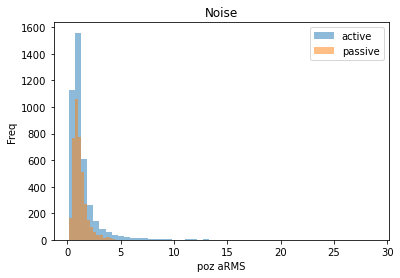

Sub2


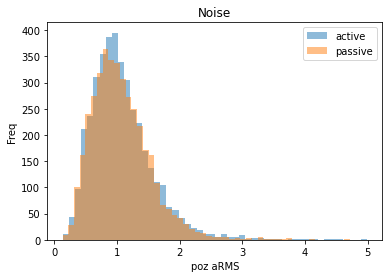

Sub3


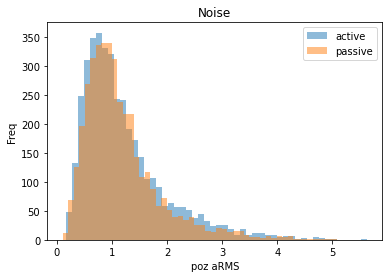

Sub4


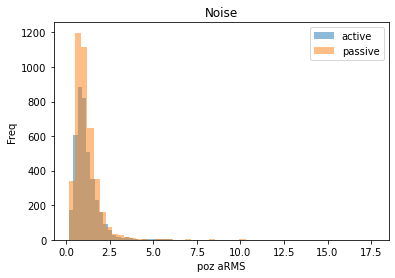

Sub5


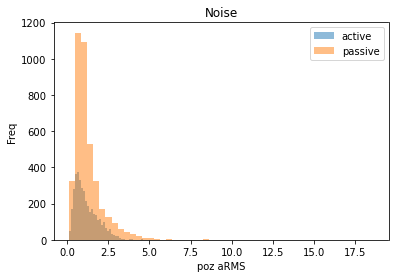

Sub6


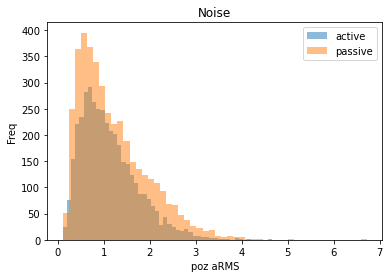

Sub7


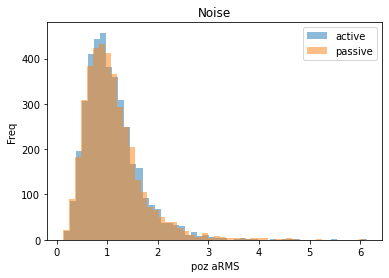

Sub8


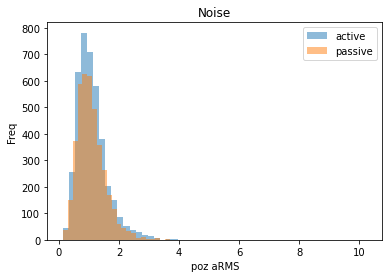

Sub9


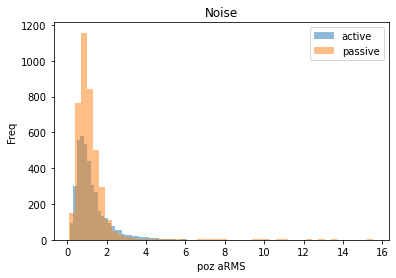

In [15]:
for sub in sub_list:
    sub_na_df=poz_na_df[poz_na_df['Sub']==sub]
    sub_np_df=poz_np_df[poz_np_df['Sub']==sub]
    print('Sub'+str(sub))
    plt.figure()
    plt.hist(sub_na_df['norm '+RMS],bins=50,alpha=0.5,label='active')
    plt.hist(sub_np_df['norm '+RMS],bins=50,alpha=0.5,label='passive')
    plt.ylabel('Freq')
    plt.xlabel('poz '+RMS)
    plt.legend()
    plt.title('Noise')
    plt.show()

## All subjects alpha RMS

(-1.0, 25.0)

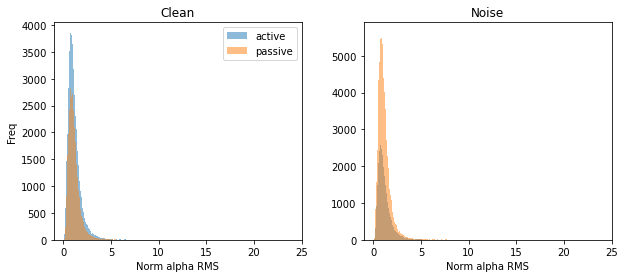

In [16]:
# Clean active vs passive
fig, axs = plt.subplots(1,2, figsize=(10, 4), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=0.25)

axs[0].hist(poz_ca_df['norm '+RMS],bins=1000,alpha=0.5,label='active')
axs[0].hist(poz_cp_df['norm '+RMS],bins=1000,alpha=0.5,label='passive')
axs[0].set_ylabel('Freq')
axs[0].set_xlabel('Norm '+wave+' RMS')
axs[0].legend()
axs[0].set_title('Clean')
axs[0].set_xlim([-1,25])

# Noise active vs passive
axs[1].hist(poz_na_df['norm '+RMS],bins=1000,alpha=0.5,label='active')
axs[1].hist(poz_np_df['norm '+RMS],bins=1000,alpha=0.5,label='passive')
axs[1].set_xlabel('Norm '+wave+' RMS')
axs[1].set_title('Noise')
axs[1].set_xlim([-1,25])

#fig.savefig(paths+'norm_pozRMS_hist_2575_a195ms.pdf')

In [17]:
poz_ca_df

,aRMS,bRMS,norm aRMS,norm bRMS,alpha,beta,Sub
0,0.000002,0.000001,1.264924,0.606468,0,L,10
1,0.000001,0.000001,0.921251,0.661316,0,L,10
2,0.000002,0.000001,1.409303,1.289655,H,H,10
3,0.000002,0.000002,1.933489,1.740864,H,H,10
4,0.000001,0.000001,0.778243,0.668644,0,L,10
...,...,...,...,...,...,...,...
3995,0.000003,0.000001,1.39353,0.736396,0,L,9
3996,0.000001,0.000003,0.493922,1.539011,L,H,9
3997,0.000001,0.000003,0.529093,1.544888,L,H,9
3998,0.000002,0.000001,1.025669,0.706859,0,L,9


In [18]:
#poz_arms_mean=poz_rms_df['aRMS'].mean()
#poz_arms_sem=poz_rms_df['aRMS'].sem()
#poz_brms_mean=poz_rms_df['bRMS'].mean()
#poz_brms_sem=poz_rms_df['bRMS'].sem()
#fz_arms_mean=fz_rms_df['aRMS'].mean()
#fz_arms_sem=fz_rms_df['aRMS'].sem()
#width=1.0
#fig = plt.subplots(figsize =(5, 5))
#p1 = plt.bar(1, poz_arms_mean, width, yerr = poz_arms_sem)
#p2 = plt.bar(2, poz_brms_mean, width, yerr = poz_brms_sem,color='orange')
#p3 = plt.bar(3, fz_arms_mean, width, yerr = fz_arms_sem,color='green')
#plt.ylabel('RMS')
#plt.xticks([1,2,3],['POZ alpha','POZ beta','FZ alpha'])
#plt.xlabel('Channel & band')

In [19]:
lo_ca=poz_ca_df[poz_ca_df[wave]=='L']
hi_ca=poz_ca_df[poz_ca_df[wave]=='H']

lo_cp=poz_cp_df[poz_cp_df[wave]=='L']
hi_cp=poz_cp_df[poz_cp_df[wave]=='H']

lo_na=poz_na_df[poz_na_df[wave]=='L']
hi_na=poz_na_df[poz_na_df[wave]=='H']

lo_np=poz_np_df[poz_np_df[wave]=='L']
hi_np=poz_np_df[poz_np_df[wave]=='H']

In [20]:
lo_ca

,aRMS,bRMS,norm aRMS,norm bRMS,alpha,beta,Sub
8,0.000001,0.000001,0.544996,0.892933,L,0,10
15,0.000001,0.000001,0.631656,1.341156,L,H,10
16,0.000001,0.000001,0.694389,0.764718,L,0,10
22,0.000001,0.0,0.455142,0.340063,L,L,10
24,0.000001,0.000001,0.62758,0.997437,L,0,10
...,...,...,...,...,...,...,...
3975,0.000001,0.000002,0.594585,1.222516,L,0,9
3984,0.000001,0.000001,0.446617,0.441695,L,L,9
3986,0.000001,0.000001,0.544226,0.817466,L,0,9
3996,0.000001,0.000003,0.493922,1.539011,L,H,9


In [21]:
# averages
lo_ca_ave=np.mean(lo_ca[RMS])
hi_ca_ave=np.mean(hi_ca[RMS])

lo_cp_ave=np.mean(lo_cp[RMS])
hi_cp_ave=np.mean(hi_cp[RMS])

lo_na_ave=np.mean(lo_na[RMS])
hi_na_ave=np.mean(hi_na[RMS])

lo_np_ave=np.mean(lo_np[RMS])
hi_np_ave=np.mean(hi_np[RMS])

In [22]:
# sem
from scipy import stats
lo_ca_sem=stats.sem(lo_ca[RMS])
hi_ca_sem=stats.sem(hi_ca[RMS])

lo_cp_sem=stats.sem(lo_cp[RMS])
hi_cp_sem=stats.sem(hi_cp[RMS])

lo_na_sem=stats.sem(lo_na[RMS])
hi_na_sem=stats.sem(hi_na[RMS])

lo_np_sem=stats.sem(lo_np[RMS])
hi_np_sem=stats.sem(hi_np[RMS])

In [23]:
data1=[lo_ca_ave,lo_na_ave]
data2=[hi_ca_ave,hi_na_ave]
data3=[lo_cp_ave,lo_np_ave]
data4=[hi_cp_ave,hi_np_ave]

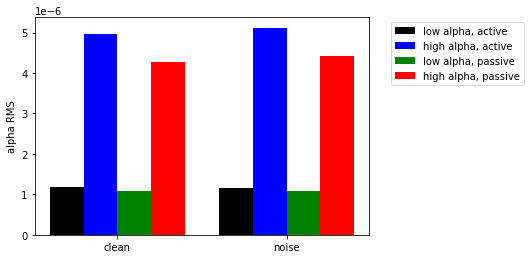

In [24]:
#figure
labels=['clean','noise']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
bar1 = ax.bar(x - 1.5*(width), data1, width, label='low '+wave+', active',color='k')
bar2 = ax.bar(x - 0.5*(width), data2, width, label='high '+wave+', active',color='b')
bar3 = ax.bar(x + 0.5*(width), data3, width, label='low '+wave+', passive',color='g')
bar4 = ax.bar(x + 1.5*(width), data4, width, label='high '+wave+', passive',color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(wave+' RMS')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.05, 1))

In [25]:
data1=[lo_ca[RMS].values,lo_na[RMS].values]
data2=[hi_ca[RMS].values,hi_na[RMS].values]
data3=[lo_cp[RMS].values,lo_np[RMS].values]
data4=[hi_cp[RMS].values,hi_np[RMS].values]
#data1

In [26]:
# boxplot
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

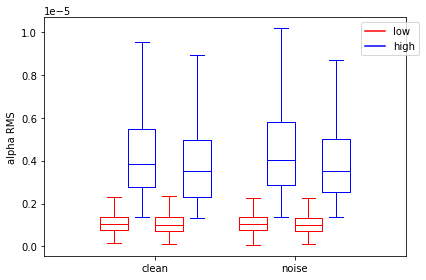

In [27]:
plt.figure()
bp1 = plt.boxplot(data1, positions=x- 1.5*(width), sym='', widths=width)
bp2 = plt.boxplot(data2, positions=x - 0.5*(width), sym='', widths=width)
bp3 = plt.boxplot(data3, positions=x + 0.5*(width), sym='', widths=width)
bp4 = plt.boxplot(data4, positions=x + 1.5*(width), sym='', widths=width)

set_box_color(bp1, 'r') # colors are from http://colorbrewer2.org/
set_box_color(bp2, 'b')
set_box_color(bp3, 'r')
set_box_color(bp4, 'b')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], 'r', label='low')
plt.plot([], 'b', label='high')
#plt.plot([], 'darkred', label='low '+wave+', passive')
#plt.plot([], 'darkcyan', label='high '+wave+', passive')
plt.legend()

plt.ylabel(wave+' RMS')
plt.xticks(x,labels)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
figpath='C:\\Users\\jlai\\OneDrive\\SIN attention\\Figs_tables\\'
plt.savefig(figpath+'alphaRMS_boxplot_allconds.pdf')

In [28]:
lo_ca_df=pd.DataFrame(data=lo_ca[RMS],columns=[RMS])
lo_ca_df['cond']='lo_ca'
lo_na_df=pd.DataFrame(data=lo_na[RMS],columns=[RMS])
lo_na_df['cond']='lo_na'
lo_cp_df=pd.DataFrame(data=lo_cp[RMS],columns=[RMS])
lo_cp_df['cond']='lo_cp'
lo_np_df=pd.DataFrame(data=lo_np[RMS],columns=[RMS])
lo_np_df['cond']='lo_np'
lo_df=pd.concat([lo_ca_df, lo_na_df,lo_cp_df,lo_np_df])
lo_df

,aRMS,cond
8,0.000001,lo_ca
15,0.000001,lo_ca
16,0.000001,lo_ca
22,0.000001,lo_ca
24,0.000001,lo_ca
...,...,...
3981,0.000001,lo_np
3982,0.000001,lo_np
3984,0.000002,lo_np
3988,0.000001,lo_np


In [29]:
hi_ca_df=pd.DataFrame(data=hi_ca[RMS],columns=[RMS])
hi_ca_df['cond']='hi_ca'
hi_na_df=pd.DataFrame(data=hi_na[RMS],columns=[RMS])
hi_na_df['cond']='hi_na'
hi_cp_df=pd.DataFrame(data=hi_cp[RMS],columns=[RMS])
hi_cp_df['cond']='hi_cp'
hi_np_df=pd.DataFrame(data=hi_np[RMS],columns=[RMS])
hi_np_df['cond']='hi_np'
hi_df=pd.concat([hi_ca_df, hi_na_df,hi_cp_df,hi_np_df])
hi_df

,aRMS,cond
2,0.000002,hi_ca
3,0.000002,hi_ca
10,0.000002,hi_ca
13,0.000002,hi_ca
14,0.000003,hi_ca
...,...,...
3983,0.000003,hi_np
3985,0.000003,hi_np
3996,0.000003,hi_np
3998,0.000003,hi_np


In [30]:
import scikit_posthocs as sp

In [78]:
sp.posthoc_conover(lo_df, val_col=RMS, group_col='cond', p_adjust='bonferroni')

,lo_ca,lo_cp,lo_na,lo_np
lo_ca,1.000000e+00,1.399228e-22,1.000000e+00,2.261885e-21
lo_cp,1.399228e-22,1.000000e+00,2.870499e-17,1.000000e+00
lo_na,1.000000e+00,2.870499e-17,1.000000e+00,3.233300e-16
lo_np,2.261885e-21,1.000000e+00,3.233300e-16,1.000000e+00


In [32]:
import scipy.stats as st
st.ttest_ind(lo_ca[RMS].values,lo_na[RMS].values)

Ttest_indResult(statistic=3.2112741040842328, pvalue=0.001322523908112325)

In [74]:
data=[hi_ca[RMS].values.astype(np.float),hi_cp[RMS].values.astype(np.float),hi_na[RMS].values.astype(np.float),hi_np[RMS].values.astype(np.float)]

C:\Users\jlai\AppData\Local\Temp/ipykernel_9160/4210333277.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data=[hi_ca[RMS].values.astype(np.float),hi_cp[RMS].values.astype(np.float),hi_na[RMS].values.astype(np.float),hi_np[RMS].values.astype(np.float)]


In [75]:
import scipy.stats as ss
H, p = ss.kruskal(*data)
p

2.038928670457965e-249

In [77]:
sp.posthoc_conover(hi_df, val_col=RMS, group_col='cond', p_adjust='bonferroni')

,hi_ca,hi_cp,hi_na,hi_np
hi_ca,1.000000e+00,8.998540e-113,2.722987e-10,8.500292e-69
hi_cp,8.998540e-113,1.000000e+00,2.090142e-186,2.873368e-06
hi_na,2.722987e-10,2.090142e-186,1.000000e+00,2.092042e-128
hi_np,8.500292e-69,2.873368e-06,2.092042e-128,1.000000e+00


In [35]:
len(hi_ca[RMS])

19997

In [37]:
RMS

'aRMS'

# Single subject plot alpha/beta activities

In [34]:
paths = 'E:\\jesyin\\SIN attention\\FFRs_FFT\\'
datapaths=[paths]
files=[]
cond='na'
while datapaths:
    # paths.pop() gets top of directory stack to process
    # os.scandir is easier and more efficient than os.listdir,
    # though it must be closed (but with statement does this for us)
    with os.scandir(datapaths.pop()) as entries:
        for entry in entries:  # loop through the folder
            #print(entry.name)  # print text to keep track the process
            if entry.name.endswith(cond+'_sffr_data.pkl'):
                files.append(entry.path)
            elif entry.is_dir():  #if it is a subfolder
                # Add to paths stack to get to it eventually
                datapaths.append(entry.path)

In [35]:
files[0]

'E:\\jesyin\\SIN attention\\FFRs_FFT\\Sub10_na_sffr_data.pkl'

In [36]:
#wave='alpha' # or 'beta'
#if wave=='alpha':
#    RMS='aRMS'
#elif wave=='beta':
#    RMS='bRMS'

In [48]:
lopoz_df=pd.DataFrame(columns=['sub','ave_rms','rms_ave'],index=range(20))
hipoz_df=pd.DataFrame(columns=['sub','ave_rms','rms_ave'],index=range(20))

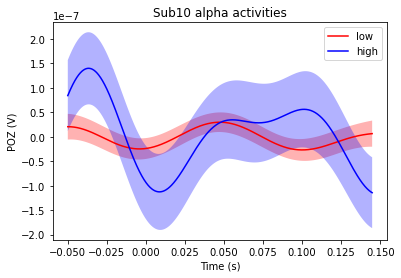

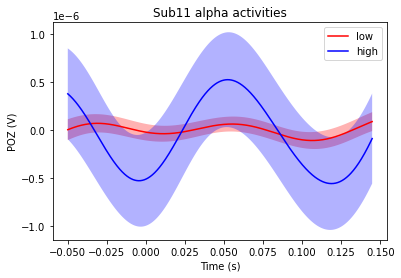

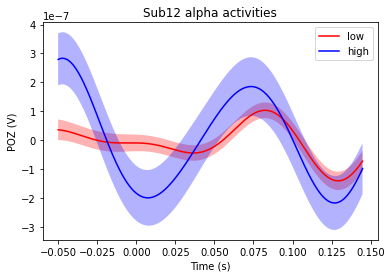

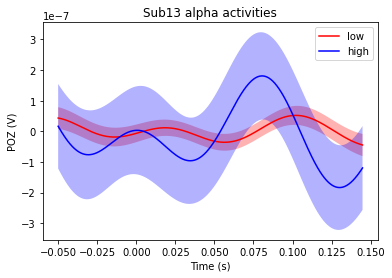

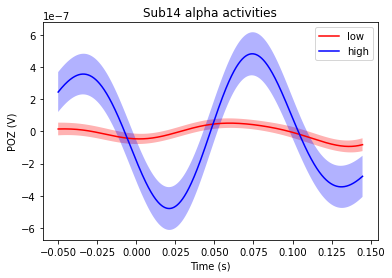

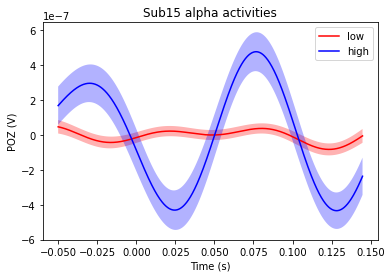

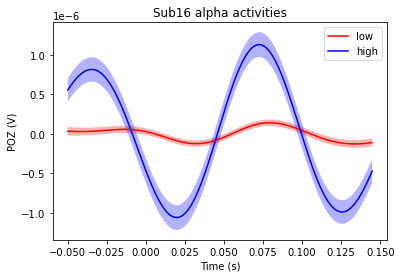

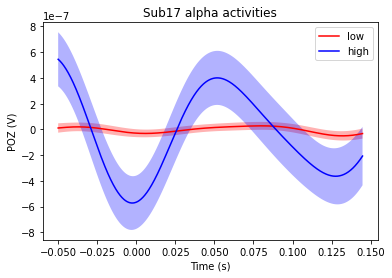

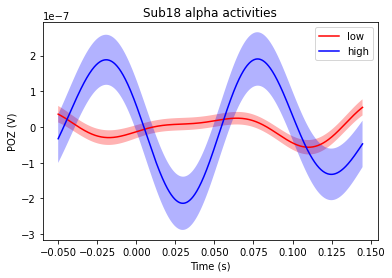

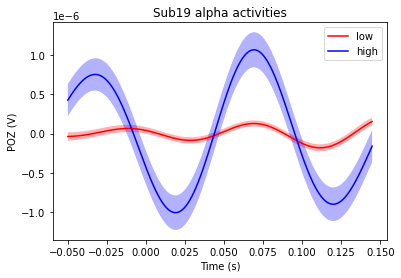

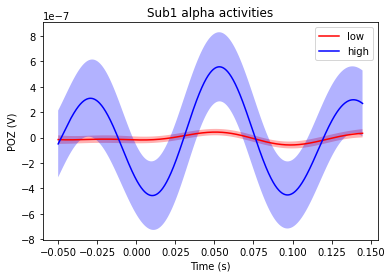

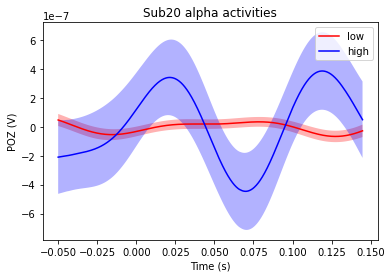

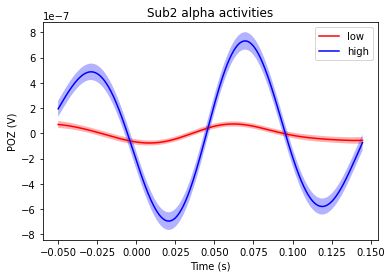

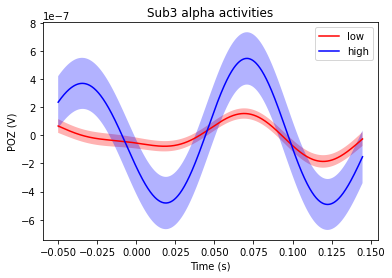

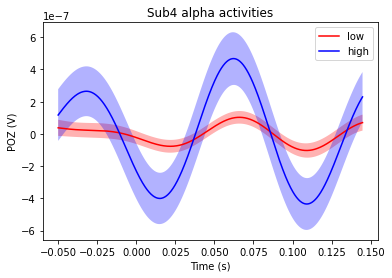

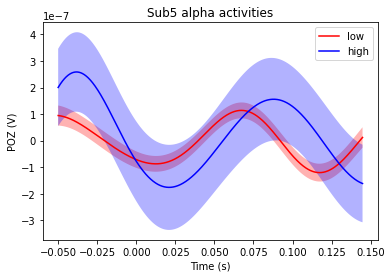

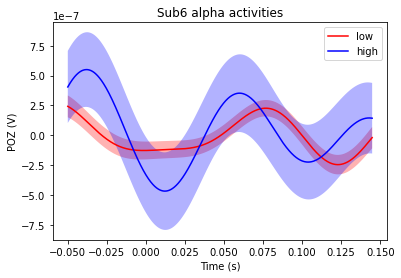

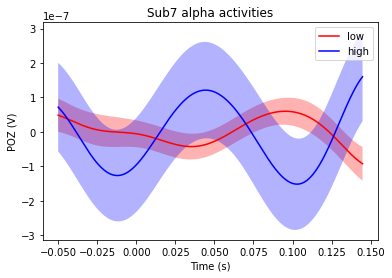

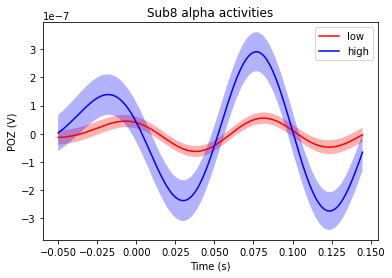

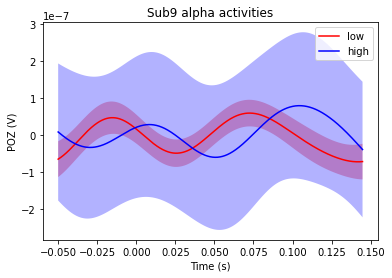

In [53]:
import pickle
import re
from scipy import stats
for n in range(len(files)):
    f =open(files[n],'rb')
    fload=pickle.load(f)
    resp_events=fload
    subject = files[n].split('\\')[-1].split('_')[0]
    sub=re.findall(r'\d+', subject)
    sub=int(sub[0])
    
    sub_ca_df=poz_ca_df[poz_ca_df['Sub']==sub]
    sub_cp_df=poz_cp_df[poz_cp_df['Sub']==sub]
    sub_na_df=poz_na_df[poz_na_df['Sub']==sub]
    sub_np_df=poz_np_df[poz_np_df['Sub']==sub]
    
    lopoz=[]
    hipoz=[]
    if cond=='ca':
        lopoz=sub_ca_df[sub_ca_df[wave]=='L']
        hipoz=sub_ca_df[sub_ca_df[wave]=='H']
    elif cond=='cp':
        lopoz=sub_cp_df[sub_cp_df[wave]=='L']
        hipoz=sub_cp_df[sub_cp_df[wave]=='H']
    elif cond=='na':
        lopoz=sub_na_df[sub_na_df[wave]=='L']
        hipoz=sub_na_df[sub_na_df[wave]=='H']
    elif cond=='np':
        lopoz=sub_np_df[sub_np_df[wave]=='L']
        hipoz=sub_np_df[sub_np_df[wave]=='H']

    lopoz_resp=[]
    hipoz_resp=[]
    
    if wave=='alpha':
        for ll in lopoz.index:
            lopoz_resp.append(resp_events['POZ_a'][ll])

        for hh in hipoz.index:
            hipoz_resp.append(resp_events['POZ_a'][hh])
    elif wave=='beta':
        for ll in lopoz.index:
            lopoz_resp.append(resp_events['POZ_b'][ll])

        for hh in hipoz.index:
            hipoz_resp.append(resp_events['POZ_b'][hh])

    # get the average poz of low poz
    lopoz_y = lopoz_resp[0][:975]
    lopoz_y_sem=np.array([lopoz_resp[0][:975]])
    for ll in range(len(lopoz_resp)-1):
        lopoz_y_sem=np.append(lopoz_y_sem,[lopoz_resp[ll+1][:975]],axis=0)
        lopoz_y_sum = lopoz_y + lopoz_resp[ll+1][:975]
        lopoz_y=lopoz_y_sum
    
    lopoz_y_ave=lopoz_y_sum/len(lopoz_resp) # average response
    lopoz_df['ave_rms'][n]=np.sqrt(np.mean(lopoz_y_ave**2)) # RMS of average response
    lopoz_df['sub'][n]=sub
    lopoz_df['rms_ave'][n]=lopoz['aRMS'].mean()
    
    # get the average poz of high poz
    hipoz_y = hipoz_resp[0][:975]
    hipoz_y_sem=np.array([hipoz_resp[0][:975]])
    for hh in range(len(hipoz_resp)-1):
        hipoz_y_sem=np.append(hipoz_y_sem,[hipoz_resp[hh+1][:975]],axis=0)
        hipoz_y_sum = hipoz_y + hipoz_resp[hh+1][:975]
        hipoz_y=hipoz_y_sum
    
    hipoz_y_ave=hipoz_y_sum/len(hipoz_resp) # average response
    hipoz_df['ave_rms'][n]=np.sqrt(np.mean(hipoz_y_ave**2)) # RMS of average response
    hipoz_df['sub'][n]=sub
    hipoz_df['rms_ave'][n]=hipoz['aRMS'].mean()
    
    # sem
    lopoz_sem=stats.sem(lopoz_y_sem)
    hipoz_sem=stats.sem(hipoz_y_sem)
    
    x=np.arange(-0.05,0.145,1/5000)
    plt.figure()
    plt.plot(x,lopoz_y_ave,'r-',label='low')
    plt.plot(x,hipoz_y_ave,'b-',label='high')
    plt.fill_between(x,lopoz_y_ave+lopoz_sem,lopoz_y_ave-lopoz_sem,facecolor='red',alpha=0.3)
    plt.fill_between(x,hipoz_y_ave+hipoz_sem,hipoz_y_ave-hipoz_sem,facecolor='blue',alpha=0.3)
    plt.xlabel('Time (s)')
    plt.ylabel('POZ (V)')
    plt.legend()
    plt.title('Sub'+str(sub)+' '+wave+' activities')
    #figpath='C:\\Users\\Jesyin\\OneDrive\\SIN attention\\Figs_tables\\'
    #plt.savefig(figpath+'Sub3_POZa_hilo.pdf')

In [101]:
lopoz_df['rms_ave'].values

array([6.839276297220427e-07, 2.6398532455841686e-06,
       9.111748478676196e-07, 9.122309370408477e-07,
       1.0236790045119576e-06, 9.866635130192858e-07,
       1.3644210746160829e-06, 9.876163916553423e-07,
       5.848239481499807e-07, 1.3384838262642575e-06,
       8.489530078673412e-07, 1.11658146739185e-06, 6.806924513648053e-07,
       1.2499030663975738e-06, 1.2984692814491231e-06,
       9.66393318854676e-07, 2.3122438757971928e-06,
       1.2600545046170228e-06, 6.693237297041436e-07,
       1.2335530051319985e-06], dtype=object)

In [102]:
lopoz_df['ave_rms'].values

array([1.807986718542038e-08, 5.459857768524227e-08,
       6.320155713776041e-08, 2.6095051867580077e-08,
       4.3774579660865304e-08, 3.5758758851141744e-08,
       8.362630808300199e-08, 2.454130782905196e-08,
       2.6081624721855928e-08, 8.475346104783965e-08,
       2.8464293658011765e-08, 3.481569442773846e-08,
       4.931063394039718e-08, 9.493750135876146e-08,
       5.791705957141383e-08, 7.355358806753713e-08,
       1.4156473673582608e-07, 3.6290468944030945e-08,
       3.5877352218017854e-08, 4.124432472563375e-08], dtype=object)

## alpha power vs RT (ms)

In [59]:
from openpyxl import load_workbook
paths = 'C:\\Users\\jlai\\OneDrive\\SIN attention\\'
fname = 'caitlin_data.xlsx'
eeg_test=pd.read_excel(paths+fname,engine='openpyxl', sheet_name='Sheet 1',usecols='A:E')

In [62]:
eeg_test_noise=eeg_test[eeg_test['SNR']=='noise']
eeg_test_noise

,sub,SNR,pc(%),pc(rau),RT(ms)
20,S1,noise,57.857143,57.333334,450.1
21,S2,noise,80.000000,79.905584,450.0
22,S3,noise,55.714286,55.322858,450.0
23,S4,noise,45.323741,45.647220,490.0
24,S5,noise,46.428571,46.677653,470.2
25,S6,noise,59.285714,58.681143,451.4
26,S7,noise,30.714286,31.597437,470.0
27,S8,noise,70.714286,69.851411,463.9
28,S9,noise,67.142857,66.263623,470.1
29,S10,noise,68.571429,67.685262,470.0


In [91]:
lopoz_df['RT(ms)']=0
lopoz_df['hi/lo']='lo'
for nn in range(len(lopoz_df)):
    sub=int(lopoz_df['sub'][nn])
    sub_id=eeg_test_noise[eeg_test_noise['sub']=='S'+str(sub)].index
    lopoz_df.loc[nn,'RT(ms)']=eeg_test_noise.loc[sub_id[0],'RT(ms)']
    
lopoz_df

,sub,ave_rms,rms_ave,RT(ms),hi/lo
0,10,0.0,0.000001,470.0,lo
1,11,0.0,0.000003,470.0,lo
2,12,0.0,0.000001,505.9,lo
3,13,0.0,0.000001,445.0,lo
4,14,0.0,0.000001,440.1,lo
5,15,0.0,0.000001,470.0,lo
6,16,0.0,0.000001,470.0,lo
7,17,0.0,0.000001,460.2,lo
8,18,0.0,0.000001,460.0,lo
9,19,0.0,0.000001,460.0,lo


In [92]:
hipoz_df['RT(ms)']=0
hipoz_df['hi/lo']='hi'
for nn in range(len(hipoz_df)):
    sub=int(hipoz_df['sub'][nn])
    sub_id=eeg_test_noise[eeg_test_noise['sub']=='S'+str(sub)].index
    hipoz_df.loc[nn,'RT(ms)']=eeg_test_noise.loc[sub_id[0],'RT(ms)']

In [93]:
hilopoz_df=pd.concat([lopoz_df,hipoz_df])

In [104]:
hilopoz_df['rms_ave'] = pd.to_numeric(hilopoz_df['rms_ave'])
lopoz_df['rms_ave'] = pd.to_numeric(lopoz_df['rms_ave'])
hipoz_df['rms_ave'] = pd.to_numeric(hipoz_df['rms_ave'])

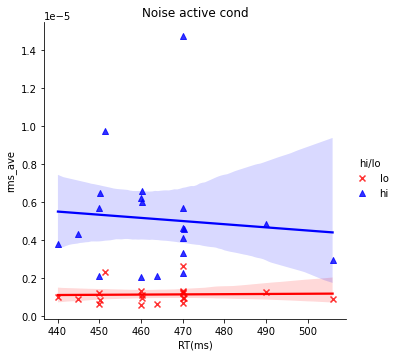

In [100]:
import seaborn as sns
sns.lmplot(x='RT(ms)', y='rms_ave', hue='hi/lo', data=hilopoz_df,markers=['x', '^'],palette=dict(hi='b', lo='r')).set(title='Noise active cond')

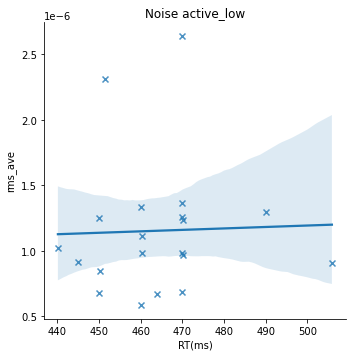

In [109]:
sns.lmplot(x='RT(ms)', y='rms_ave', data=lopoz_df,markers='x',palette=['r']).set(title='Noise active_low')

In [106]:
r,pv=stats.spearmanr(lopoz_df['RT(ms)'], lopoz_df['rms_ave'])
print('noise active low,r='+str(r)+',pv='+str(pv))

noise active low,r=0.14790096141363346,pv=0.5337568338950005


In [107]:
r,pv=stats.spearmanr(hipoz_df['RT(ms)'], hipoz_df['rms_ave'])
print('noise active hi,r='+str(r)+',pv='+str(pv))

noise active hi,r=-0.06598658278454417,pv=0.7822403962248721
